# Enriching Wine Data with Fire Data and Using Linear Regression

As a consumer, we want to find high quality wines from California. We would like to see if there are specific factors that impact the ratings of these wines. By running linear regression on our dataset, we can find out if there is a correlation between features of the wine and its rating. 

Within our dataset, we can only run linear regression on the vintage and price of the wines, so we plan to enrich our data with potential latent variables. Since one of California's major natural disasters are wildfires, we plan to see if these fires effect the ratings of the wines. To join these datasets, we will join by the county and the year the fire happened and the vintage of the wine. 


In [1]:
import pandas as pd
import numpy as np
import pylab as pl

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import warnings
%matplotlib inline

In [2]:
# Load the cleaned data into dataframe

""" 
    Information of cleaned dataset:
    
    - Province and Variety of wine is transfomed from a categorical attribute to numerical attribute
    - Vintage of wine is extracted from the title of each wine
    - Rows were removed if there were null values present within each of the three attributes (Province, Variety, Vintage)
    - Dataset size was reduced from 125,000 rows to 22,000 rows
    
"""
warnings.simplefilter('ignore')
data = pd.read_csv("../data/California_Wines.csv")
print(data.shape)
data.head()

(35421, 18)


,Unnamed: 0,Unnamed: 0.1,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,province_id,variety_numerical,vintage
0,10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,7,80,2011
1,12,12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,7,80,2012
2,14,14,US,Building on 150 years and six generations of w...,NaN,87,12.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou,7,125,2012
3,23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,7,326,2011
4,25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,7,440,2011


Run linear regression on the wine's points to price to see if there is any correlation

In [3]:
x = data.loc[:, ['points']]

y = data.loc[:, ['price']]

reg = LinearRegression().fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

0.19298961136454473


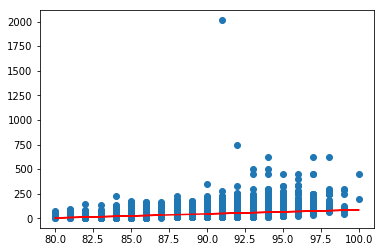

In [4]:
plt.scatter(x, y)  
plt.plot(x,predict,color = 'red')
plt.show()

From this linear regression, we can see that 

Run linear regression on the wine's vintage to price to see if there is any correlation

0.0002509334927570661


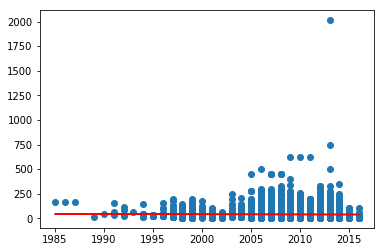

In [5]:
x = data.loc[:, ['vintage']]
y = data.loc[:, ['price']]

reg = LinearRegression().fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
plt.plot(x,predict,color = 'red')
plt.show()

0.031022698407894955


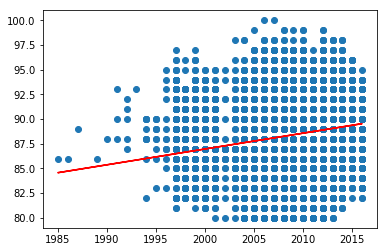

In [8]:
x = data.loc[:, ['vintage']]
y = data.loc[:, ['points']]

reg = LinearRegression().fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
plt.plot(x,predict,color = 'red')
plt.show()

0.22652056198505477


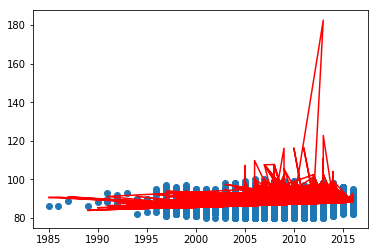

In [13]:
x = data.loc[:, ['vintage', 'price']]
y = data.loc[:, ['points']]

reg = LinearRegression().fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x.iloc[:,0], y)  
plt.plot(x.iloc[:,0],predict,color = 'red')
plt.show()

run linear regression on normalized values

In [6]:
# Normalizing province id between 1 and 0 
data['norm_vintage'] = abs((data.vintage - data.vintage.min()) / (data.vintage.max()))
# Normalizing price between 1 and 0 
data['norm_price'] = abs((data.price - data.price.min()) / (data.price.max()))
# Normalizing points(rating) between 1 and 0 
data['norm_points'] = abs((data.points - data.points.min()) / (data.points.max()))

0.0002509334927570661


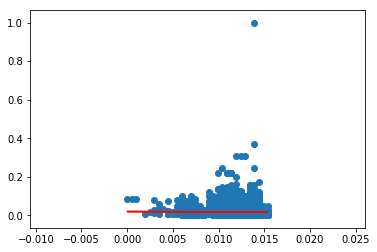

In [7]:
x = data.loc[:, ['norm_vintage']]
y = data.loc[:, ['norm_price']]

reg = LinearRegression().fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
plt.plot(x,predict,color = 'red')
plt.show()